# ANN Model
Bank Churn rate customer prediction using number of paramters
From past 6 month bank seen unusual churn rate of customers and
they want to know the problem and address the problem to avoid churn

Need to build a model to predict which customer is having high rate of churn.


In [66]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Part 1 - Data Preprocessing

In [6]:
dataset = pd.read_csv("C:\\Users\\Admin\\Desktop\\Deep-Learning\\Supervised Deep Learning\\Artificial Neural Networks (ANN)\\Artificial_Neural_Networks\\Churn_Modelling.csv")

In [7]:
dataset.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [8]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dummies = pd.get_dummies(dataset[["Geography","Gender"]], drop_first=True)
dataset = pd.concat([dataset.drop(["CustomerId",
                                   "Surname",
                                  "RowNumber",
                                  "Geography",
                                  "Gender"],axis=1),
                    dummies],axis =1)

In [12]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
X = dataset.drop(["Exited"], axis =1).values

In [14]:
y = dataset["Exited"].values

In [15]:
y.shape

(10000,)

In [16]:
print(y)
print(X)

[1 0 1 ... 1 1 0]
[[619.  42.   2. ...   0.   0.   0.]
 [608.  41.   1. ...   0.   1.   0.]
 [502.  42.   8. ...   0.   0.   0.]
 ...
 [709.  36.   7. ...   0.   0.   0.]
 [772.  42.   3. ...   1.   0.   1.]
 [792.  28.   4. ...   0.   0.   0.]]


In [17]:
# Splitting the dataset into the Training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [23]:
X_train.shape

(8000, 11)

In [24]:
# part 2

In [25]:
from keras.models import Sequential
from keras.layers import Dense


In [72]:
# Part 3

In [73]:
classifier = Sequential()

In [26]:
# Input Layer
classifier.add(Dense(11,kernel_initializer = "uniform",
                    activation ="relu"))
# Hidden Layer
classifier.add(Dense(6,kernel_initializer = "uniform",
                    activation ="relu"))
# Output Layer
classifier.add(Dense(units=1, kernel_initializer ="uniform" ,activation="sigmoid"))

# Compiling
classifier.compile(loss ="binary_crossentropy",
                  optimizer="adam", metrics=["accuracy"])

In [27]:
classifier.fit(X_train,y_train,
              epochs=25,
              batch_size=256)

Epoch 1/25
8000/8000 [==============================] - 1s 149us/step - loss: 0.6864 - accuracy: 0.7960
Epoch 2/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.6631 - accuracy: 0.7960
Epoch 3/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.6121 - accuracy: 0.7960
Epoch 4/25
8000/8000 [==============================] - 0s 15us/step - loss: 0.5340 - accuracy: 0.7960
Epoch 5/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.4711 - accuracy: 0.7960
Epoch 6/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.4462 - accuracy: 0.7960
Epoch 7/25
8000/8000 [==============================] - 0s 18us/step - loss: 0.4396 - accuracy: 0.7960
Epoch 8/25
8000/8000 [==============================] - 0s 15us/step - loss: 0.4365 - accuracy: 0.7960
Epoch 9/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.4343 - accuracy: 0.7960
Epoch 10/25
8000/8000 [==============================] - 0s 16us/step - 

In [28]:
losses = pd.DataFrame(classifier.history.history)
losses

,loss,accuracy
0,0.686431,0.796000
1,0.663112,0.796000
2,0.612115,0.796000
3,0.534032,0.796000
4,0.471118,0.796000
5,0.446198,0.796000
6,0.439562,0.796000
7,0.436508,0.796000
8,0.434277,0.796000
9,0.432353,0.796000


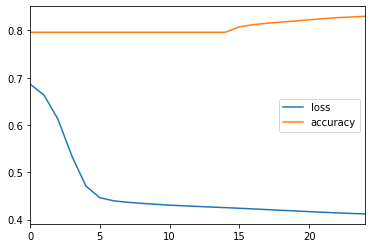

In [29]:
losses.plot()

In [30]:
# Prediction

In [31]:
pred = classifier.predict_classes(X_test)
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [33]:
cm = confusion_matrix(y_test,pred)
cm

array([[1543,   52],
       [ 277,  128]], dtype=int64)

In [ ]:
# Ploting confusion matrix

In [35]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [36]:
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[1543,   52],
       [ 277,  128]], dtype=int64)

In [37]:
#1524 + 156 correct prediction

Text(51.0, 0.5, 'Actual')

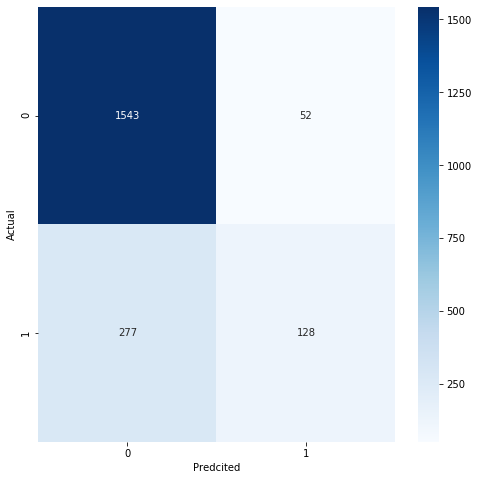

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(cm1,annot=True, fmt ="2g", cmap ="Blues",)
plt.ylim(2,0)
plt.xlabel("Predcited")
plt.ylabel("Actual")
#cm1.index.name = "Actual"
#plt.xlim(0,10)

In [ ]:
# Predicting a single value
"""Predicting if the customer with the following information will leave the bank:

Credit Score: 600
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card : Yes
Is Active Member: Yes
Estimated Salary: 50000
Geography: France
Gender: Male"""

In [42]:
# Putting this value in 1 array, by using array function
# Standarization for same scale
new_customer = classifier.predict_classes(sc.transform(np.array([[600,40,3,60000,2,1,1,50000,0,0,1]])))

In [44]:
# False means customer will not leave the bank
new_customer = (new_customer > .5)
new_customer

array([[False]])

In [45]:
# Part 4 
# Evalution Model Perfromance by using hyperparameter tuning
# K-Fold Cross Validation

In [26]:
# Evalauting the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Architecuture of model
# building a function
 # Input Layer
    # Hidden Layer
    # Output Layer
    # Compiling
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(11,kernel_initializer = "uniform",activation ="relu"))
    classifier.add(Dense(6,kernel_initializer = "uniform",activation ="relu"))
    classifier.add(Dense(units=1, kernel_initializer ="uniform" ,activation="sigmoid"))
    classifier.compile(loss ="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier,epochs=100,batch_size=10)
accuracies = cross_val_score(estimator= classifier,X = X_train,y = y_train,cv = 10, n_jobs=-1)


In [22]:

# Creating Global Classifier , it will train on K fold training test

In [29]:
mean = accuracies.mean()
mean


0.840499997138977

In [30]:
variance = accuracies.std()
variance

0.01573411600000719

In [ ]:
# Improving ANN Using Dropout Technique

In [19]:
from keras.layers import Dropout

In [ ]:
classifier = Sequential()
# Input Layer
classifier.add(Dense(11,kernel_initializer = "uniform",
                    activation ="relu"))
classifier.add(Dropout(rate=0.1))
# Hidden Layer
classifier.add(Dense(6,kernel_initializer = "uniform",
                    activation ="relu"))
classifier.add(Dropout(rate=0.1))
# Output Layer
classifier.add(Dense(units=1, kernel_initializer ="uniform" ,activation="sigmoid"))

# Compiling
classifier.compile(loss ="binary_crossentropy",
                  optimizer="adam", metrics=["accuracy"])

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [28]:
# Hyper Parameter Tunning
# Architecuture of model
# building a function
 # Input Layer
    # Hidden Layer
    # Output Layer
    # Compiling
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
    
    
    
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(11,kernel_initializer = "uniform",activation ="relu"))
    classifier.add(Dense(6,kernel_initializer = "uniform",activation ="relu"))
    classifier.add(Dense(units=1, kernel_initializer ="uniform" ,activation="sigmoid"))
    classifier.compile(loss ="binary_crossentropy",optimizer=optimizer, metrics=["accuracy"])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)

# Using GridSearch Cv to find best epoch and batch size to over fitting or over fitting
parameters = {"batch_size": [16,25,32],
              "epochs":[25,100,150],
             "optimizer":["adam","rmsprop"]}
Grid_search = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring="accuracy",
                          cv = 5)
Grid_search = Grid_search.fit(X_train, y_train, validation_data = (X_test, y_test))

Train on 6400 samples, validate on 2000 samples
Epoch 1/25
6400/6400 [==============================] - 1s 232us/step - loss: 0.5245 - accuracy: 0.7970 - val_loss: 0.4340 - val_accuracy: 0.7975
Epoch 2/25
6400/6400 [==============================] - 1s 139us/step - loss: 0.4263 - accuracy: 0.7980 - val_loss: 0.4212 - val_accuracy: 0.7975
Epoch 3/25
6400/6400 [==============================] - 1s 138us/step - loss: 0.4187 - accuracy: 0.8144 - val_loss: 0.4151 - val_accuracy: 0.8345
Epoch 4/25
6400/6400 [==============================] - 1s 135us/step - loss: 0.4129 - accuracy: 0.8298 - val_loss: 0.4071 - val_accuracy: 0.8365
Epoch 5/25
6400/6400 [==============================] - 1s 136us/step - loss: 0.4084 - accuracy: 0.8347 - val_loss: 0.4026 - val_accuracy: 0.8435
Epoch 6/25
6400/6400 [==============================] - 1s 138us/step - loss: 0.4051 - accuracy: 0.8345 - val_loss: 0.4007 - val_accuracy: 0.8435
Epoch 7/25
6400/6400 [==============================] - 1s 138us/step - loss

In [38]:
best_parameter = Grid_search.best_params_
best_parameter

{'batch_size': 25, 'epochs': 150, 'optimizer': 'adam'}

In [48]:
best_estimator = Grid_search.best_estimator_
print(best_estimator)

In [32]:
best_accuracy = Grid_search.best_score_
best_accuracy

0.8535

In [ ]:
# Saving model

In [50]:
from sklearn.externals import joblib
joblib.dump(Grid_search.best_estimator_, 'ANN_Churn_rate_prediction.pkl')

D:\Python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['ANN_Churn_rate_prediction.pkl']

# Final Model

After hyper parameetr tunning best Accuracy Achieved 85 percent
Best parameters are batch size 25 , epochs 150 and optimizer is adam
Now model is ready to deployed